# Data Analysis

## <a id="index">Table of Contents:</a>
* [Intro](#intro)
* [Data Load](#load-data)
* [Data Validation](#validation)
* [Exploratory Data Analysis](#eda)
    * [Category Analysis](#category)
    * [Servings Analysis](#servings)
    * [High-Traffic Column Analysis](#target-analysis)
    * [Handling Missing Values](#missing-values)
    * [Other Numeric Features Analysis](#numeric-features)

## <a id="intro">Intro</a> <font size='2'>[Table of contents🔝](#index)<font size>


The primary goal of this notebook is to prepare our dataset for subsequent analysis and modeling. In doing so, we will conduct data preprocessing tasks to enhance data quality, remove duplicates, handle missing values, and address outliers. Additionally, we will perform exploratory analysis to gain insights into the dataset's characteristics.

As part of our data preprocessing journey, we will introduce the concept of a data preprocessing pipeline. This pipeline will help streamline and organize the various data preparation tasks. 

Let's get started!

## <a id="load-data">Load Data</a> <font size='2'>[Table of contents🔝](#index)<font size>

Imports and function definitions

In [1]:
import matplotlib.pyplot as plt 
import numpy as np

import os
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

c:\Users\chiso\anaconda3\envs\forecasting\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
def get_dataTypes_and_missingValues(df):
    info = pd.DataFrame()
    info['data_types'] =  df.dtypes
    info['unique_values'] = df.nunique()
    info['missing_values'] = df.isna().sum()
    return info

In [3]:
data_dir = os.path.join("data")
print(f"The files contained in the data directory are: {', '.join(os.listdir(data_dir))}")

The files contained in the data directory are: recipe_site_traffic.csv


In [4]:
data_path = os.path.join(data_dir, "recipe_site_traffic.csv")
raw_df = pd.read_csv(data_path)

## <a id="validation">Data Validation</a> <font size='2'>[Table of contents🔝](#index)<font size>

In [5]:
print(f"There are {raw_df.shape[0]} rows and {raw_df.shape[1]} columns")

There are 947 rows and 8 columns


In [6]:
raw_df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


There are some missing values and the recipie column is a unique identifier of each recipe/row.

The recipe column can be dropped and the other columns explored further.

In [7]:
raw_df.drop("recipe", axis=1, inplace=True)
raw_df.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,NaN,NaN,NaN,NaN,Pork,6,High
1,35.48,38.56,0.66,0.92,Potato,4,High
2,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,97.03,30.56,38.63,0.02,Beverages,4,High
4,27.05,1.85,0.80,0.53,Beverages,4,NaN


The high_traffic column seems to represent the column for the target values. The missing values for the target need to be handled before further analysis is performed.

In [8]:
print(f"The unique values in the target values are {raw_df['high_traffic'].unique()}")

The unique values in the target values are ['High' nan]


Since the target contains 'High' for popular recipes the and there is only 1 unique value for this feature the missing values represent recipes that were not popular and will be set to 'Low'.

In [9]:
raw_df['high_traffic'].fillna('Low', inplace=True)

C:\Users\chiso\AppData\Local\Temp\ipykernel_25876\274834029.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_df['high_traffic'].fillna('Low', inplace=True)


We visualize the distribution of traffic to get more insight

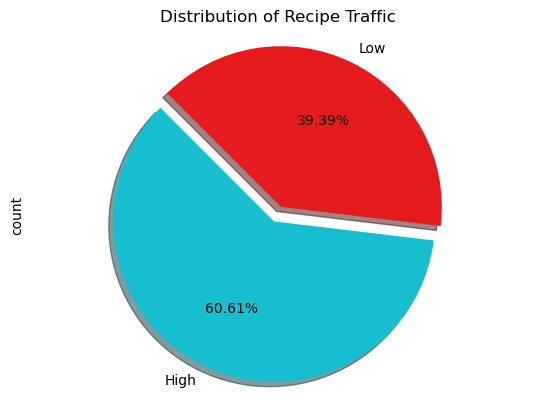

In [10]:
explode = (0.1, 0)
colors = ["#17becf", "#e41a1c"]
raw_df['high_traffic'].value_counts().plot.pie(
    autopct='%.2f%%', startangle=135, explode=explode, shadow=True, colors=colors
)
plt.title('Distribution of Recipe Traffic')
plt.axis('equal')
plt.show()

Before preprocessing the data we will check for duplicates then split the data to avoid **data leakage**.

In [11]:
print(f"There are {raw_df.duplicated().sum()} duplicates in the dataframe")

There are 23 duplicates in the dataframe


Removing the duplicates from the dataframe below

In [12]:
raw_df.drop_duplicates(inplace=True)
print(f"After dropping the duplicates there are {len(raw_df)} observations")

After dropping the duplicates there are 924 observations


Since the duplicates have been removed the data can be split.

In [13]:
X = raw_df.drop('high_traffic', axis=1)
y = raw_df['high_traffic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42, shuffle=True)

In [14]:
print("After the split the observations in the data are")
print(f"Train: {len(X_train)}, validation: {len(X_val)}, test: {len(X_test)}")

After the split the observations in the data are
Train: 628, validation: 111, test: 185


## <a id="eda">Exploratory Analysis</a> <font size='2'>[Table of contents🔝](#index)<font size>

Let's get a better overview of the data using visualizations and complete the data validation from the previous step preparing the data to be used in training the model.

In [15]:
train_df = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
train_df.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,724.43,5.18,2.10,10.67,One Dish Meal,6,High
1,239.90,51.13,131.39,3.38,Dessert,2,High
2,247.89,44.68,2.64,19.94,Chicken Breast,1,High
3,138.64,17.79,8.52,6.82,Vegetable,2,High
4,128.30,14.75,3.01,16.34,Pork,4,High


### <a id="category">Category Analysis</a> <font size='2'>[Table of contents🔝](#index)<font size>

Taking a closer look at the category column

c:\Users\chiso\anaconda3\envs\forecasting\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chiso\anaconda3\envs\forecasting\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chiso\anaconda3\envs\forecasting\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chiso\anacond

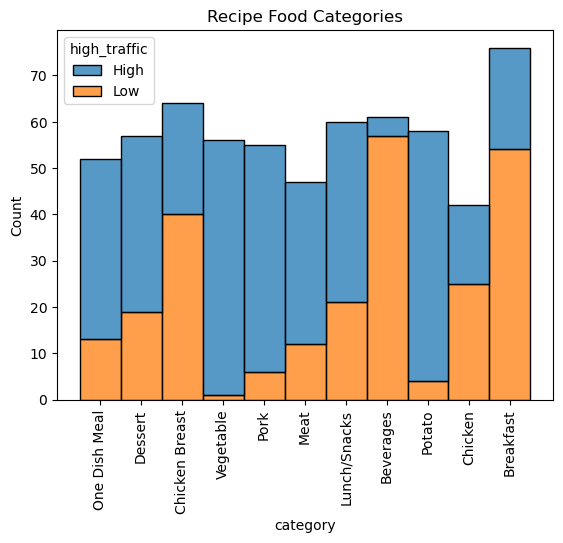

In [16]:
sns.histplot(train_df, x='category', hue='high_traffic', multiple='stack')
plt.title('Recipe Food Categories')
plt.xticks(rotation=90)
plt.show()

It seems like vegetable and potato featured foods generate the highest traffic relative to the low traffic, however beverages and breakfast items generate the least traffic relative to the high traffic.

In [17]:
categories = train_df['category'].unique()
print(f"The {len(categories)} categories in the train features are:\n {', '.join(categories)}")

The 11 categories in the train features are:
 One Dish Meal, Dessert, Chicken Breast, Vegetable, Pork, Meat, Lunch/Snacks, Beverages, Potato, Chicken, Breakfast


The category column needs to match the required categories in one of the 10 possible categories. 

Lunch/Snacks', 'Beverages', 'Potato','Vegetable', 'Meat', 'Chicken, 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal'

However, there are 11 categories, an extra category 'Chicken Breast' was added. This category needs to be converted to 'Chicken'

In [18]:
train_df['category'].replace('Chicken Breast', 'Chicken', inplace=True)

C:\Users\chiso\AppData\Local\Temp\ipykernel_25876\2977413697.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['category'].replace('Chicken Breast', 'Chicken', inplace=True)


In [19]:
print("After replacing the occurences of Chicken Breast with Chicken")
categories = train_df['category'].unique()
print(f"The {len(categories)} categories in the train features are:\n {', '.join(categories)}")

After replacing the occurences of Chicken Breast with Chicken
The 10 categories in the train features are:
 One Dish Meal, Dessert, Chicken, Vegetable, Pork, Meat, Lunch/Snacks, Beverages, Potato, Breakfast


Visualizing the Food Categories

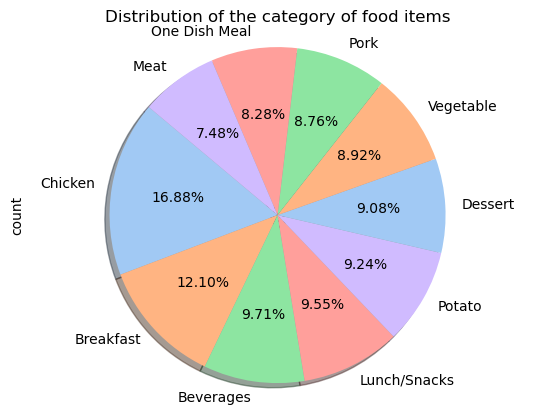

In [20]:
colors = sns.color_palette('pastel')[0:5]

train_df['category'].value_counts().plot.pie(colors=colors,
                                            autopct='%.2f%%', 
                                            shadow=True, startangle=140)
plt.title("Distribution of the category of food items")
plt.axis('equal')
plt.show()

The chicken category is the largest category in the dataframe.

c:\Users\chiso\anaconda3\envs\forecasting\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chiso\anaconda3\envs\forecasting\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chiso\anaconda3\envs\forecasting\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chiso\anacond

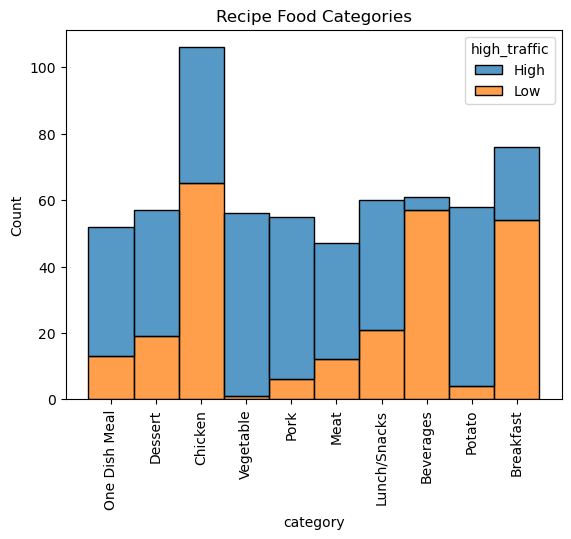

In [21]:
sns.histplot(train_df, x='category', hue='high_traffic', multiple='stack')
plt.title('Recipe Food Categories')
plt.xticks(rotation=90)
plt.show()

After merging the 2 chicken categories chicken generates the most traffic(high and low) but it seems that chicken based dishes generate nearly as much high traffic as they do low traffic.

**Encoding Categorical Values**

Converting the categories to numeric representations. We will opt for creating a unique column for each category (one-hot encoding) as there is no inherent order in the categories.

In [22]:
cat_features = ['category']
enc = OneHotEncoder(sparse_output=False)
enc.fit(train_df[cat_features])
converted_categories = enc.get_feature_names_out().tolist()
train_df[converted_categories] = enc.transform(train_df[cat_features])
train_df.drop('category', axis=1, inplace=True)

In [23]:
train_df.head()

,calories,carbohydrate,sugar,protein,servings,high_traffic,category_Beverages,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
0,724.43,5.18,2.10,10.67,6,High,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,239.90,51.13,131.39,3.38,2,High,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,247.89,44.68,2.64,19.94,1,High,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,138.64,17.79,8.52,6.82,2,High,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,128.30,14.75,3.01,16.34,4,High,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Now there is only 1 other non-numeric column the target column `high_traffic`

In [24]:
non_numeric_cols = train_df.select_dtypes(exclude=np.number).columns.values
print(f"The non numeric columns are {', '.join(non_numeric_cols)}")

The non numeric columns are servings, high_traffic


### <a id="servings">Servings Analysis</a> <font size='2'>[Table of contents🔝](#index)<font size>

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   calories                614 non-null    float64
 1   carbohydrate            614 non-null    float64
 2   sugar                   614 non-null    float64
 3   protein                 614 non-null    float64
 4   servings                628 non-null    object 
 5   high_traffic            628 non-null    object 
 6   category_Beverages      628 non-null    float64
 7   category_Breakfast      628 non-null    float64
 8   category_Chicken        628 non-null    float64
 9   category_Dessert        628 non-null    float64
 10  category_Lunch/Snacks   628 non-null    float64
 11  category_Meat           628 non-null    float64
 12  category_One Dish Meal  628 non-null    float64
 13  category_Pork           628 non-null    float64
 14  category_Potato         628 non-null    fl

In [26]:
train_df['servings'].sort_values()

313    1
404    1
112    1
396    1
392    1
      ..
91     6
88     6
85     6
109    6
0      6
Name: servings, Length: 628, dtype: object

The feature servings seems to contain only numeric values. However, the data type for that column is type object so there should either be some incorrect values or the column was simply stored in a wrong data type.

Below we will try converting the column to int data type.

In [27]:
try:
    train_df['servings'].astype(int)
except Exception:
    print("The column contains non-numeric characters")

The column contains non-numeric characters


Let us try to figure out the non integer data types contained in the servings column

In [28]:
mask = train_df['servings'].astype(str).str.contains(r'\D', regex=True)
non_numeric_values = train_df[mask]

print("Non-numeric values in servings")
non_numeric_values

Non-numeric values in servings


,calories,carbohydrate,sugar,protein,servings,high_traffic,category_Beverages,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
395,513.75,65.87,18.63,18.39,4 as a snack,Low,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


There is one occurence where the serving does not contain only numeric values however this instance can be converted to a numeric representation of 4. The category is snack and 4 serving were taken as a snack. This is probably an inputation error.

In [29]:
train_df.loc[mask, 'servings'] = 4
train_df['servings'] = train_df['servings'].astype(int)

non_numeric_cols = train_df.select_dtypes(exclude=np.number).columns.values
print(f"The non numeric columns are {''.join(non_numeric_cols)}")

The non numeric columns are high_traffic


### <a id="target-analysis">High-Traffic Column Analysis</a> <font size='2'>[Table of contents🔝](#index)<font size>

Visualizing the target column

c:\Users\chiso\anaconda3\envs\forecasting\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chiso\anaconda3\envs\forecasting\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


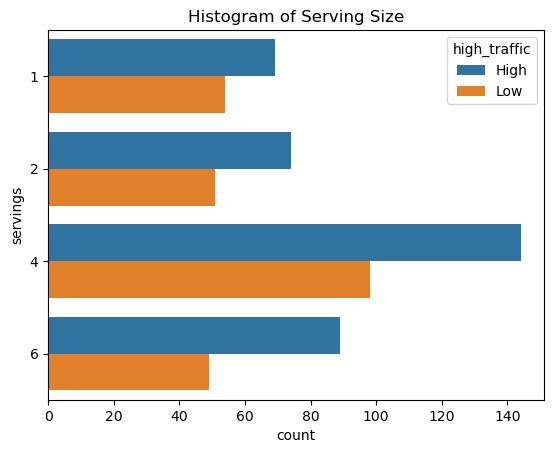

In [30]:
sns.countplot(train_df, y='servings', hue='high_traffic')
plt.title('Histogram of Serving Size')
plt.show()

When the serving size was 4 the most traffic is generated however, there is no trend to indicate that higher servings translate to higher traffic. Serving might not be a good indicator on its own of if there is high traffic or not.

C:\Users\chiso\AppData\Local\Temp\ipykernel_25876\1380931655.py:1: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(train_df, x='servings', y='high_traffic', scale='count')
c:\Users\chiso\anaconda3\envs\forecasting\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chiso\anaconda3\envs\forecasting\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


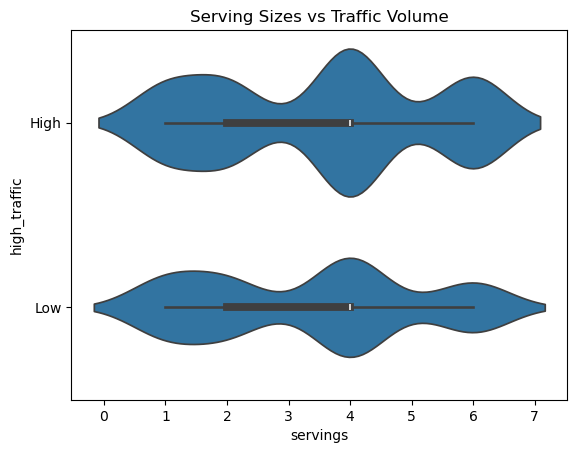

In [31]:
sns.violinplot(train_df, x='servings', y='high_traffic', scale='count')
plt.title('Serving Sizes vs Traffic Volume')
plt.show()

From the violin plot the high traffic recipies have a wider distance indicating that there are more high traffic recipies than low traffic recipies if we distribute them based on the servings.

Some of the serving sizes are missing(3 and 5) this might be as a result of the split. **Could this pose a challenge?** 

### <a id="missing-values">Handling Missing Values</a> <font size='2'>[Table of contents🔝](#index)<font size>

In [32]:
get_dataTypes_and_missingValues(train_df)

,data_types,unique_values,missing_values
calories,float64,612,14
carbohydrate,float64,579,14
sugar,float64,495,14
protein,float64,551,14
servings,int32,4,0
high_traffic,object,2,0
category_Beverages,float64,2,0
category_Breakfast,float64,2,0
category_Chicken,float64,2,0
category_Dessert,float64,2,0


There are still quite a few missing values. Let us explore them further.

In [33]:
missing_indices = train_df[train_df['calories'].isnull()].index
train_df.iloc[missing_indices]

,calories,carbohydrate,sugar,protein,servings,high_traffic,category_Beverages,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
8,NaN,NaN,NaN,NaN,1,High,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
85,NaN,NaN,NaN,NaN,6,High,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
118,NaN,NaN,NaN,NaN,4,Low,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
123,NaN,NaN,NaN,NaN,1,Low,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
166,NaN,NaN,NaN,NaN,6,High,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
306,NaN,NaN,NaN,NaN,2,High,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
345,NaN,NaN,NaN,NaN,4,High,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
369,NaN,NaN,NaN,NaN,1,High,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
406,NaN,NaN,NaN,NaN,4,High,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
423,NaN,NaN,NaN,NaN,4,High,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


There are 4 columns with 14 missing values each, however all the 14 columns coincide and are spread accross different categories and servings. The missing data would be difficult to recreate/predict and do not make up a significant amount of the data for this analysis so they would be omitted.

In [34]:
train_df.drop(missing_indices, inplace=True)
print(f"After cleaning up the dataframe there are {train_df.isna().values.sum()} missing values")

After cleaning up the dataframe there are 0 missing values


### <a id="numeric-features">Other Numeric Features Analysis</a> <font size='2'>[Table of contents🔝](#index)<font size>

So far we have taken a look at 2 of the 6 columns the original features contained. Further analysis will focus on the other 4 columns and explore their relationship to the target.

In [35]:
numeric_cols = ['calories', 'carbohydrate', 'sugar', 'protein', 'servings']
train_df.loc[:,numeric_cols].describe()

,calories,carbohydrate,sugar,protein,servings
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,423.582182,35.838111,9.251482,22.706042,3.457655
std,441.516097,46.933285,14.692544,32.560317,1.770890
min,0.140000,0.050000,0.010000,0.000000,1.000000
25%,108.567500,8.247500,1.662500,3.060000,2.000000
50%,276.615000,21.145000,4.525000,10.550000,4.000000
75%,576.762500,46.325000,9.875000,28.625000,4.000000
max,2906.010000,530.420000,131.390000,239.570000,6.000000


The code above gives the summary statistics of the unexplored columns plus the servings column. 

The ranges are below
* Calories 0.14 - 2906.0
* Carbohydrate 0.05 - 530.4 grams
* Sugar 0.01 - 131.39 grams
* Protein 0.00 - 239.57 grams
* Servings 1 - 6

A graphical visualization might provide insights that are easier to digest.

**Calories**

In [36]:
fig = px.histogram(train_df,
                   x='calories',
                   marginal='box',
                   color='high_traffic',
                   color_discrete_sequence=['green','grey'],
                   title='Distribution of Calories by Traffic')
fig.update_layout(bargap=0.1)
fig.update_layout(width=700, height=500)
fig.show()

c:\Users\chiso\anaconda3\envs\forecasting\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


The data is right skewed with most of the calories residing in the left part of the graph and a couple of outliers towards the right part of the graph i.e towards where there are more calories.

However higher traffic seems to be the norm regardless of the calories.

**Carbohydrates**

In [37]:
fig = px.histogram(train_df,
                   x='carbohydrate',
                   marginal='box',
                   color='high_traffic',
                   color_discrete_sequence=['green','grey'],
                   title='Distribution of Carbohydrates by Traffic')
fig.update_layout(bargap=0.1)
fig.update_layout(width=700, height=500)
fig.show()

c:\Users\chiso\anaconda3\envs\forecasting\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



There is a similar trend as the calories: 
* Right skewed data and 
* Higher traffic regardless of the grams of carbohydrates

However there seems to be a higher skew to the data

**Sugar**

In [38]:
fig = px.histogram(train_df,
                   x='sugar',
                   marginal='box',
                   color='high_traffic',
                   color_discrete_sequence=['green','grey'],
                   title='Distribution of Sugar by Traffic')
fig.update_layout(bargap=0.1)
fig.update_layout(width=700, height=500)
fig.show()

c:\Users\chiso\anaconda3\envs\forecasting\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



**Protein**

In [39]:
fig = px.histogram(train_df,
                   x='protein',
                   marginal='box',
                   color='high_traffic',
                   color_discrete_sequence=['green','grey'],
                   title='Distribution of Protein by Traffic')
fig.update_layout(bargap=0.1)
fig.update_layout(width=700, height=500)
fig.show()

c:\Users\chiso\anaconda3\envs\forecasting\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



The sugar and protein columns have a similar trend as the calories: 
* Right skewed data and 
* Higher traffic regardless of the grams

#### Visualization of all the numeric columns

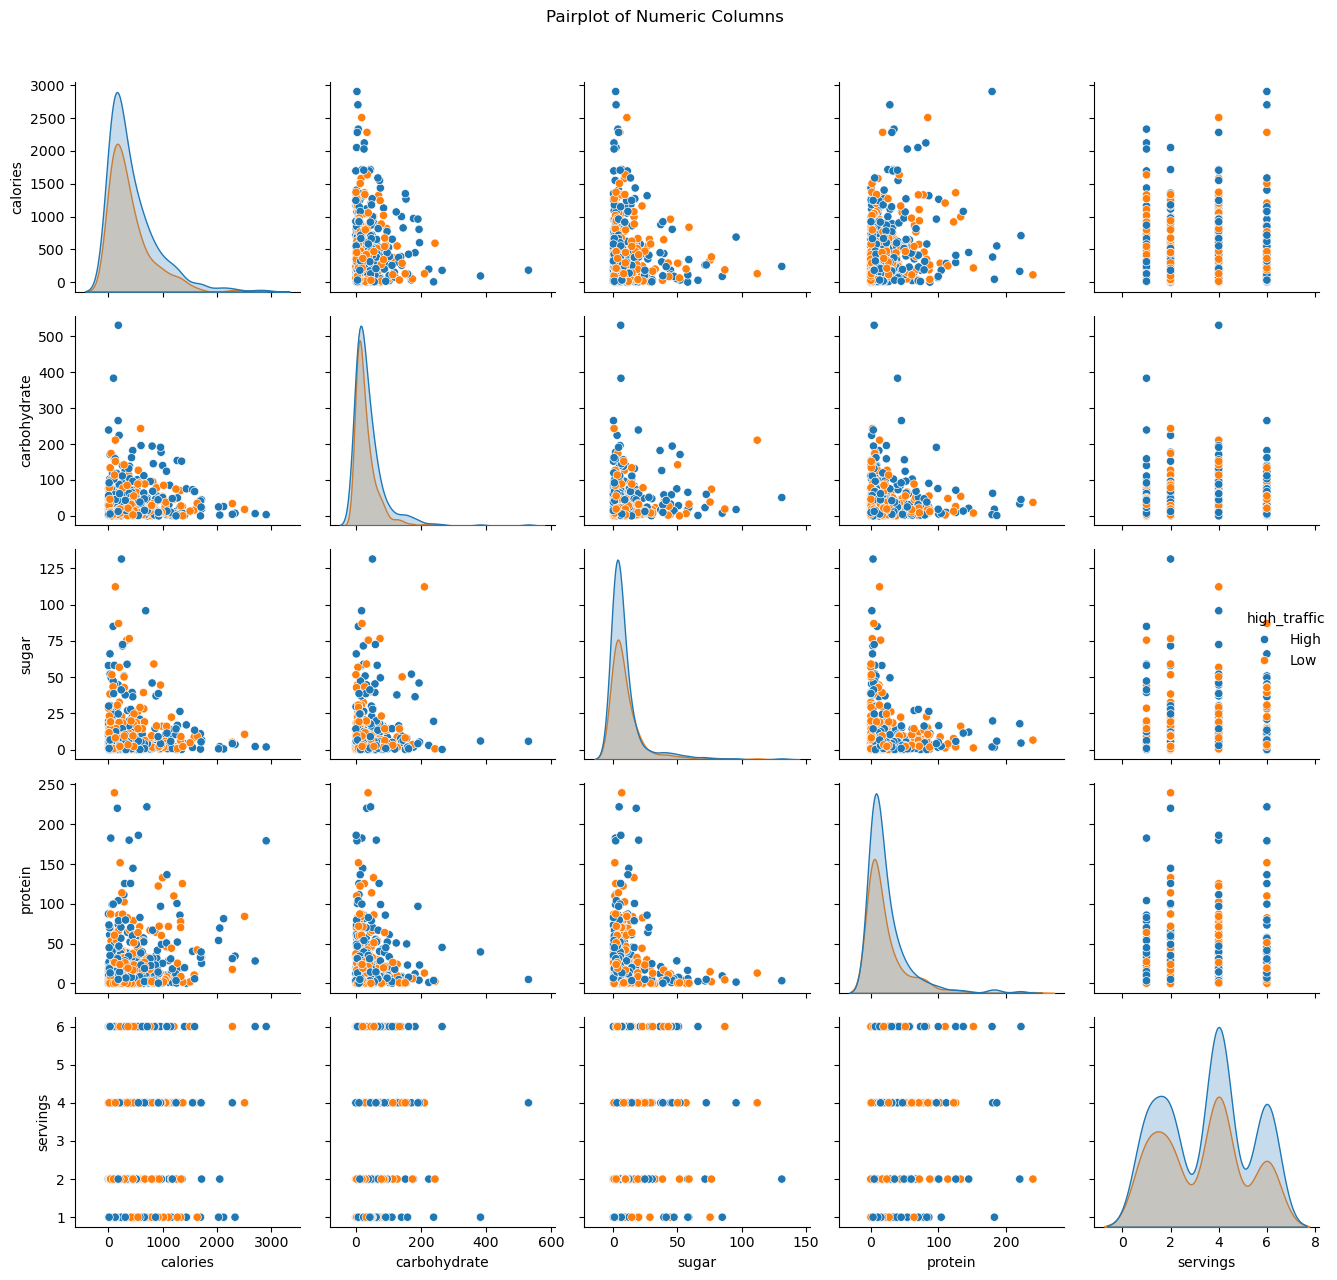

In [40]:
import warnings
# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pair_plot = sns.pairplot(train_df[numeric_cols + ['high_traffic']], hue='high_traffic', diag_kind='kde')

pair_plot.fig.suptitle('Pairplot of Numeric Columns', y=1.02)
pair_plot.fig.tight_layout()

plt.show()

There is no noticable trend in each pair of numerical columns (calories, carbohydrate, protein, sugar, serving) and the traffic generated.

In [41]:
y_train = train_df['high_traffic']
X_train =  train_df.drop('high_traffic', axis=1)

At this step we will go ahead and train the model. Further feature engineering could be included in future steps.

But, before the model is trained we will input all the pre-processing steps into a pipeline to ensure reproducability, maintainability and standardization of steps.